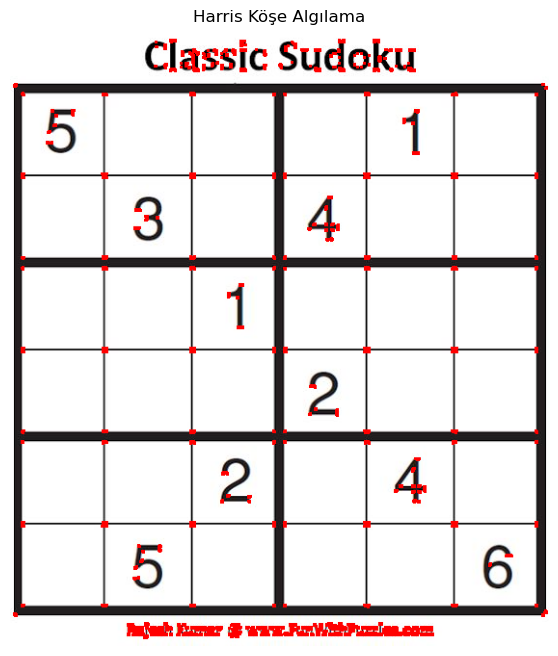

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Sudoku resmini yükle
img = cv2.imread('sudoku.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Harris köşe tespiti
gray_float = np.float32(gray)
harris = cv2.cornerHarris(
    gray_float,    # Gri tonlamalı görüntü
    blockSize=2,   # Köşe tespiti için pencere boyutu (2x2)
    ksize=1,       # Sobel türevleri için çekirdek boyutu
    k=0.04         # Harris detektör sabiti
)

# Köşeleri daha belirgin hale getirmek için genişletme (dilate)
harris = cv2.dilate(harris, None)

# Güçlü köşeleri kırmızı ile işaretle
img_harris = img.copy()
img_harris[harris > 0.01 * harris.max()] = [0, 0, 255]

# Sonucu matplotlib ile göster
plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(img_harris, cv2.COLOR_BGR2RGB))
plt.title('Harris Köşe Algılama')
plt.axis('off')
plt.show()
